# <center>Approach2: Graph Representation of Chess Board</center>

## Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from tqdm import tqdm
import pandas as pd
import numpy as np
import chess

tqdm.pandas()

## Starter

In [2]:
df = pd.read_csv("../data/filtered/filtered_df.csv")

## Feature Engineering

In [5]:
from src.lib.graph_helper import build_attack_graph, build_legal_moves_graph, visualize_graph

In [28]:
sample_fen = df["FEN"][1]

board = chess.Board(sample_fen)

attack_graph = build_attack_graph(sample_fen)
legal_moves_graph = build_legal_moves_graph(sample_fen)

visualize_graph(attack_graph, "attack_graph")
visualize_graph(legal_moves_graph, "legal_moves_graph")

In [40]:
from src.lib.graph_feature_generator import (calculate_central_control, calculate_threat_features, calculate_mobility, 
calculate_material_advantage, calculate_king_safety)


In [30]:
# Measure over the central squares
calculate_central_control(attack_graph, verbose=1)

Source: d1 Target: d4 Data: {'piece': 'R', 'value': 5, 'color': 'white'}
Source: d1 Target: d5 Data: {'piece': 'R', 'value': 5, 'color': 'white'}
Source: f3 Target: d4 Data: {'piece': 'N', 'value': 3, 'color': 'white'}
Source: f3 Target: e5 Data: {'piece': 'N', 'value': 3, 'color': 'white'}
Source: b6 Target: d4 Data: {'piece': 'q', 'value': 9, 'color': 'black'}
Source: d6 Target: d4 Data: {'piece': 'Q', 'value': 9, 'color': 'white'}
Source: d6 Target: d5 Data: {'piece': 'Q', 'value': 9, 'color': 'white'}
Source: d6 Target: e5 Data: {'piece': 'Q', 'value': 9, 'color': 'white'}
Source: f6 Target: d4 Data: {'piece': 'b', 'value': 3, 'color': 'black'}
Source: f6 Target: e5 Data: {'piece': 'b', 'value': 3, 'color': 'black'}


{'white': 7, 'black': 3}

In [31]:
calculate_threat_features(attack_graph, verbose=1)


Source: b6 Target: f2 Data: {'piece': 'q', 'value': 9, 'color': 'black'}
Source: b6 Target: b3 Data: {'piece': 'q', 'value': 9, 'color': 'black'}
Source: b6 Target: d6 Data: {'piece': 'q', 'value': 9, 'color': 'black'}
Source: d6 Target: b6 Data: {'piece': 'Q', 'value': 9, 'color': 'white'}
Source: d6 Target: f6 Data: {'piece': 'Q', 'value': 9, 'color': 'white'}
Source: d6 Target: f8 Data: {'piece': 'Q', 'value': 9, 'color': 'white'}


{'white_threat_count': 3,
 'white_threat_value': 17,
 'black_threat_count': 3,
 'black_threat_value': 11}

In [34]:
calculate_mobility(attack_graph, verbose=1)


Source: d1 Data: {'piece': 'R', 'color': 'white', 'value': 5}
Source: g1 Data: {'piece': 'K', 'color': 'white', 'value': 1000}
Source: a2 Data: {'piece': 'P', 'color': 'white', 'value': 1}
Source: f2 Data: {'piece': 'P', 'color': 'white', 'value': 1}
Source: g2 Data: {'piece': 'P', 'color': 'white', 'value': 1}
Source: h2 Data: {'piece': 'P', 'color': 'white', 'value': 1}
Source: b3 Data: {'piece': 'P', 'color': 'white', 'value': 1}
Source: f3 Data: {'piece': 'N', 'color': 'white', 'value': 3}
Source: a6 Data: {'piece': 'p', 'color': 'black', 'value': 1}
Source: b6 Data: {'piece': 'q', 'color': 'black', 'value': 9}
Source: d6 Data: {'piece': 'Q', 'color': 'white', 'value': 9}
Source: f6 Data: {'piece': 'b', 'color': 'black', 'value': 3}
Source: b7 Data: {'piece': 'p', 'color': 'black', 'value': 1}
Source: f7 Data: {'piece': 'p', 'color': 'black', 'value': 1}
Source: g7 Data: {'piece': 'p', 'color': 'black', 'value': 1}
Source: h7 Data: {'piece': 'p', 'color': 'black', 'value': 1}
Sourc

{'white': 43, 'black': 34}

In [38]:
calculate_material_advantage(attack_graph, verbose=1)

Data: {'piece': 'R', 'color': 'white', 'value': 5}
Data: {'piece': 'K', 'color': 'white', 'value': 1000}
Data: {'piece': 'P', 'color': 'white', 'value': 1}
Data: {'piece': 'P', 'color': 'white', 'value': 1}
Data: {'piece': 'P', 'color': 'white', 'value': 1}
Data: {'piece': 'P', 'color': 'white', 'value': 1}
Data: {'piece': 'P', 'color': 'white', 'value': 1}
Data: {'piece': 'N', 'color': 'white', 'value': 3}
Data: {'piece': 'p', 'color': 'black', 'value': 1}
Data: {'piece': 'q', 'color': 'black', 'value': 9}
Data: {'piece': 'Q', 'color': 'white', 'value': 9}
Data: {'piece': 'b', 'color': 'black', 'value': 3}
Data: {'piece': 'p', 'color': 'black', 'value': 1}
Data: {'piece': 'p', 'color': 'black', 'value': 1}
Data: {'piece': 'p', 'color': 'black', 'value': 1}
Data: {'piece': 'p', 'color': 'black', 'value': 1}
Data: {'piece': 'r', 'color': 'black', 'value': 5}
Data: {'piece': 'k', 'color': 'black', 'value': 1000}


{'white_material': 22, 'black_material': 22, 'material_difference': 0}

In [52]:
calculate_king_safety(df.loc[1, "FEN"], color="white") ## CHECK THIS

{'king_threatened_squares': 1, 'king_safe_squares': 4}

In [45]:
from src.lib.graph_feature_generator import calculate_connectivity
calculate_connectivity(attack_graph)

{'white_connectivity': 0.04405458089668616,
 'black_connectivity': 0.03466286799620133}

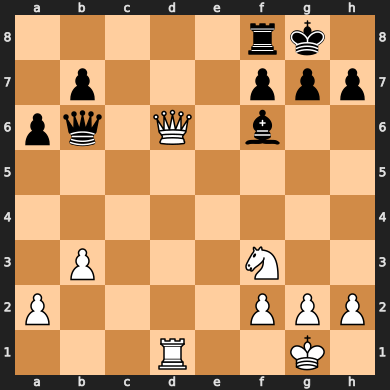

In [35]:
import chess
chess.Board(df["FEN"][1])

In [54]:
# from src.lib.graph_feature_generator import generate_features

# features_df = df.apply(generate_features, axis=1, result_type="expand")

# data_with_features = pd.concat([df, features_df], axis=1)
# data_with_features.to_csv("tmp1.csv")


,white_central_control,black_central_control,white_threat_count,white_threat_value,black_threat_count,black_threat_value,white_mobility,black_mobility,white_material,black_material,material_difference,white_king_threatened_squares,white_king_safe_squares,black_king_threatened_squares,black_king_safe_squares,white_connectivity,black_connectivity
0,4.0,5.0,5.0,11.0,5.0,11.0,39.0,0.0,22.0,27.0,-5.0,1.0,2.0,1.0,2.0,0.020742,0.140000
1,7.0,3.0,3.0,17.0,3.0,11.0,0.0,33.0,22.0,22.0,0.0,1.0,4.0,1.0,4.0,0.044055,0.034663
2,1.0,2.0,1.0,5.0,3.0,7.0,0.0,16.0,9.0,8.0,1.0,2.0,6.0,2.0,6.0,0.031481,0.013968
3,1.0,4.0,2.0,4.0,3.0,3.0,22.0,0.0,37.0,38.0,-1.0,4.0,1.0,4.0,1.0,0.083333,0.026667
4,2.0,2.0,2.0,2.0,2.0,2.0,0.0,7.0,3.0,2.0,1.0,2.0,6.0,2.0,6.0,0.175595,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340311,5.0,5.0,1.0,1.0,2.0,2.0,0.0,45.0,23.0,21.0,2.0,4.0,1.0,4.0,1.0,0.000817,0.041667
3340312,3.0,2.0,3.0,15.0,4.0,8.0,0.0,26.0,21.0,19.0,2.0,4.0,1.0,4.0,1.0,0.135556,0.022403
3340313,4.0,2.0,3.0,7.0,5.0,11.0,40.0,0.0,33.0,34.0,-1.0,0.0,5.0,0.0,5.0,0.123148,0.031838
3340314,2.0,5.0,6.0,10.0,4.0,14.0,33.0,0.0,39.0,39.0,0.0,0.0,5.0,0.0,5.0,0.016964,0.081250


In [3]:
from src.lib.feature_generator import calculate_move_length

df = pd.read_csv("../data/feature/graph_data.csv")

df['MoveLength'] = df['Moves'].apply(calculate_move_length)

drop_cols = ["Unnamed: 0", "Unnamed: 0.1", "index", "PuzzleId", "FEN", "Moves", "RatingDeviation", "Popularity", "NbPlays", "Themes", "GameUrl", "OpeningTags"]
df_final = df.drop(columns=drop_cols)

In [5]:
from src.lib.models.lgbm_learner import LightGBMLearner
from src.lib.train_helper import stratified_split

In [8]:
X_train, y_train, X_val, y_val, X_test, y_test = stratified_split(df_final)

best_parameters = {
            'objective': 'regression',
            'metric': 'mse',
            'boosting_type': 'gbdt',
            'learning_rate': 0.09988815078243668,
            'num_leaves': 148,
            'feature_fraction': 1,
            'bagging_fraction': 0.7859578029185396,
            'bagging_freq': 1,
            'verbose': 1
            }
learner_lgbm = LightGBMLearner(params=best_parameters)
learner_lgbm.train(X_train, y_train, X_val, y_val)
learner_lgbm.evaluate(X_test, y_test)
learner_lgbm.save_model("../results/models/lgbm/filtered_df_graph_1")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 4.920639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1966
[LightGBM] [Info] Number of data points in the train set: 2137801, number of used features: 90
[LightGBM] [Info] Start training from score 1514.152790
Validation MSE: 163668.5224


In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = stratified_split(df_final)

learner_lgbm = LightGBMLearner()
learner_lgbm.optimize(X_train, y_train, X_val, y_val, n_trials=100, db_path="sqlite:///lightgbm_optuna1.db")

[I 2024-12-30 18:41:36,162] Using an existing study with name 'lightgbm_optimization' instead of creating a new one.
/teamspace/studios/this_studio/notebooks/../src/lib/models/lgbm_learner.py:67: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/teamspace/studios/this_studio/notebooks/../src/lib/models/lgbm_learner.py:70: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
[I 2024-12-30 18:42:45,798] Trial 100 finished with value: 174187.88381217676 and parameters: {'learning_rate': 0.09345151833692117, 'num_leaves': 141, 'bagging_fraction': 0.72194850689

KeyboardInterrupt: 